# Kinematics of waterbomb folding and derived characteristics

In [1]:
%matplotlib widget

## Cell folding

In [2]:
import sympy as sp
sp.init_printing()
import numpy as np

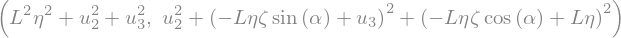

In [3]:
L = sp.symbols('L', positive=True)
eta,zeta = sp.symbols(r'eta, zeta', positive=True)
u_2, u_3 = sp.symbols('u_2, u_3', positive=True)
alpha = sp.symbols('alpha', positive=True)
b = L
a = eta*L
c = zeta*a

U0_a = sp.Matrix([a, b, 0])
W0_a = sp.Matrix([c, 0, 0])
UW0_a = W0_a - U0_a
L2_U_0 = (U0_a.T * U0_a)[0]
L2_UW_0 = (UW0_a.T * UW0_a)[0]

U1_a = sp.Matrix([a, u_2, u_3])
W1_a = sp.Matrix([c * sp.cos(alpha), 0, c * sp.sin(alpha)])
UW1_a = U1_a - W1_a
L2_U_1 = (U1_a.T * U1_a)[0]
L2_UW_1 = (UW1_a.T * UW1_a)[0]
L2_U_1, L2_UW_1

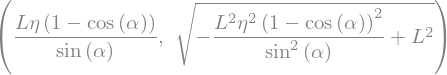

In [4]:
u2_sol = sp.solve(L2_U_1 - L2_U_0, u_2)[0]
u3_sol = sp.solve((L2_UW_1 - L2_UW_0).subs(u_2, u2_sol), u_3)[0]
u_3_ = u3_sol
u_2_ = u2_sol.subs(u_3, u3_sol)
u_3_, u_2_

In [5]:
U_pp_a = U1_a.subs({u_2: u_2_, u_3: u_3_})
U_mm_a = sp.Matrix([-U_pp_a[0], -U_pp_a[1], U_pp_a[2]])
U_mp_a = sp.Matrix([-U_pp_a[0], U_pp_a[1], U_pp_a[2]])
U_pm_a = sp.Matrix([U_pp_a[0], -U_pp_a[1], U_pp_a[2]])
W_p_a = W1_a.subs({u_2: u_2_, u_3: u_3_})
W_m_a = sp.Matrix([-W_p_a[0], W_p_a[1], W_p_a[2]])

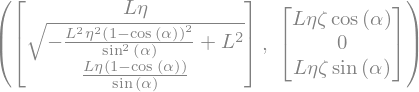

In [6]:
U_pp_a, W_p_a

## Compatible rotation of a cell around $x$ axis

In [7]:
V_UW = U_pp_a - W_p_a
L_UW = sp.sqrt(V_UW[1] ** 2 + V_UW[2] ** 2)
theta_sol = sp.simplify(2 * sp.asin( V_UW[2] / L_UW))

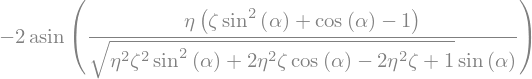

In [8]:
theta_sol

In [9]:
get_theta = sp.lambdify((alpha,L,eta,zeta), theta_sol)

## Rotation of a cell  of a shifted cell

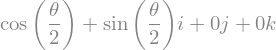

In [10]:
from sympy.algebras.quaternion import Quaternion
theta = sp.Symbol(r'theta')
q_theta = Quaternion.from_axis_angle([1, 0, 0], theta)
q_theta

In [11]:
d_1, d_2, d_3 = sp.symbols('d_1, d_2, d_3')
D_a = sp.Matrix([d_1, d_2, d_3])

In [12]:
UD_pp_a = U_pp_a + D_a
WD_p_a = W_p_a + D_a

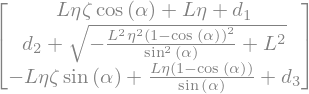

In [13]:
UD_pp_a - W_m_a

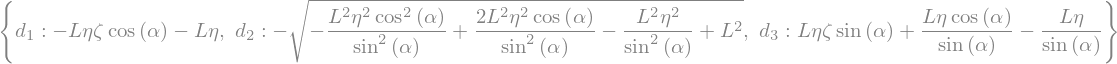

In [14]:
d_subs = sp.solve(UD_pp_a - W_m_a, [d_1, d_2, d_3])
d_subs

## Rotate by $\theta$

Define the center of rotation

In [15]:
UD_pp_a_ = UD_pp_a.subs(d_subs)

Rostated point

In [16]:
WD_p_a_ = WD_p_a.subs(d_subs)

Pull back the point so that the center of rotation is at origin

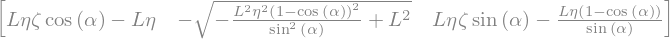

In [17]:
WD_p_a_pb = WD_p_a_ - UD_pp_a_
WD_p_a_pb.T

Rotate the point around the quaternion

In [18]:
WD_p_a_rot = q_theta.rotate_point(WD_p_a_pb.T, q_theta)

Push forward to the center of rotation

In [19]:
WD_p_a_pf = sp.Matrix(WD_p_a_rot) + UD_pp_a_
WD_p_a_theta = WD_p_a_pf.subs(theta, -theta_sol)

Rotate also the midpoint

In [20]:
DD_a_pb = D_a.subs(d_subs) - UD_pp_a_
DD_a_rot = q_theta.rotate_point(DD_a_pb.T, q_theta)
DD_a_pf = sp.simplify(sp.Matrix(DD_a_rot) + UD_pp_a_)
DD_a_theta = DD_a_pf.subs(theta, -theta_sol)

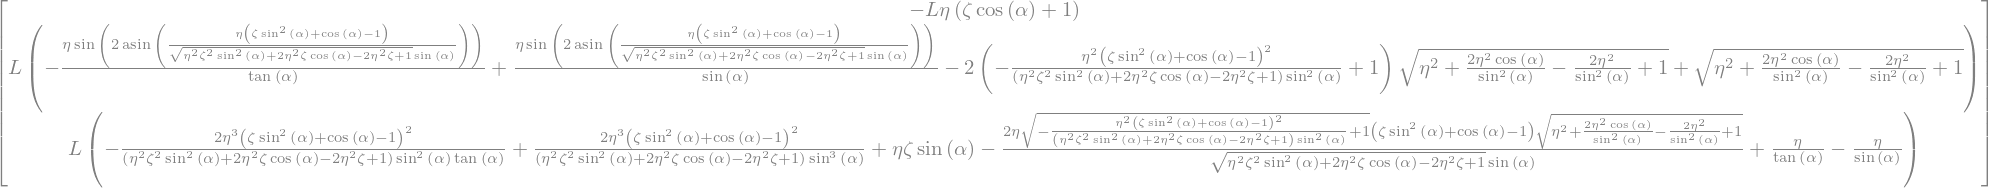

In [21]:
DD_a_theta

In [22]:
get_U_mm_a = sp.lambdify((alpha, L, eta, zeta), U_mm_a )
get_WD_p_a_theta = sp.lambdify((alpha, L, eta, zeta), WD_p_a_theta)

In [23]:
get_U_mm_a(0.2, 3, 2, 0.4)

array([[-6.        ],
       [-2.93897709],
       [ 0.60200803]])

In [24]:
get_WD_p_a_theta(0.2, 3, 2, 0.4)

array([[-6.        ],
       [-2.93897709],
       [ 0.60200803]])

In [25]:
sp.simplify((WD_p_a_theta - U_mm_a)[0])

## Cross sectional height

In [26]:
H_sol = W_p_a[2]
H_sol

In [27]:
get_H = sp.lambdify((alpha, L, eta, zeta), H_sol)

In [28]:
V_WD = (WD_p_a_theta - DD_a_theta)
Vzy_WD = sp.Matrix([V_WD[1], V_WD[2]])

In [29]:
L_WD = Vzy_WD.T * Vzy_WD

In [30]:
get_L_WD = sp.lambdify((alpha, L, eta, zeta), L_WD, 'numpy')

In [31]:
np.sqrt(get_L_WD(np.pi/2,2,1,1.3))

array([[2.6]])

## Symmetry axis of the cylinder

In [32]:
D0_a = sp.Matrix([0,0,0])

In [33]:
W_m_a[2]

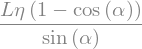

In [34]:
U_mm_a[2]

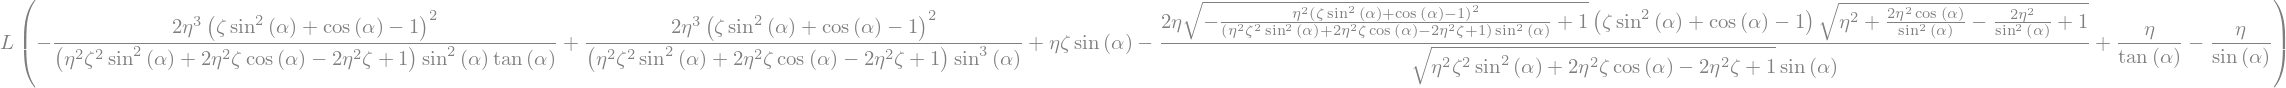

In [35]:
DD_a_theta[2]

Find the point at which the line connection between
\begin{align}
 U_{mm} + \rho (U_{mm} - D)
\end{align}
intersects the vertical axis

In [36]:
rho = (U_mm_a[2] - DD_a_theta[2]) / (U_mm_a[1] - DD_a_theta[1]) * U_mm_a[1]
R_0 = U_mm_a[2] - rho

In [37]:
get_U_mm_a = sp.lambdify((alpha, L, eta, zeta), U_mm_a, 'numpy')
get_DD_a_theta = sp.lambdify((alpha, L, eta, zeta), DD_a_theta, 'numpy')
get_rho = sp.lambdify((alpha, L, eta, zeta), rho, 'numpy')
get_R_0 = sp.lambdify((alpha, L, eta, zeta), R_0, 'numpy')

In [38]:
data = dict(alpha=1, L=1, eta=1, zeta=1)
get_U_mm_a(**data)

array([[-1.        ],
       [-0.83758796],
       [ 0.54630249]])

In [39]:
get_DD_a_theta(**data)

array([[-1.54030231],
       [-0.31003043],
       [-0.10925565]])

In [40]:
get_rho(**data)

In [41]:
get_theta(**data)

In [42]:
get_R_0(**data)

In [43]:
phi_0 = sp.asin( DD_a_theta[1] / R_0 )

In [44]:
get_phi_0 = sp.lambdify((alpha, L, eta, zeta), phi_0, 'numpy')

In [45]:
get_phi_0(**data)

# Curvature visualizaion

\begin{align}
\eta &= \frac{b}{a}, & \zeta = \frac{c}{b}\\[8pt]
\end{align}

Curvature can be set identical to the angle $\theta$. 

# Parametric Study

In [79]:
import numpy as np
R_list = []
theta_list = []
H_list = []
alpha_range = [np.pi/4]
n = 50
eta_range = np.linspace(0.3,0.9,n)
zeta_range = np.linspace(0.4,1.1,n)
L_ = 1
eta_grid, zeta_grid = np.meshgrid(eta_range, zeta_range)
for alpha_ in alpha_range:
    radius_bc_list = []
    R_grid = get_R_0(alpha=alpha_,L=L_,eta=eta_grid,zeta=zeta_grid)
    R_list.append(R_grid/L_)
    theta_grid = get_theta(alpha=alpha_,L=L_,eta=eta_grid,zeta=zeta_grid)
    theta_list.append(theta_grid)
    H_grid = get_H(alpha=alpha_,L=L_,eta=eta_grid,zeta=zeta_grid)
    H_list.append(H_grid/L_)

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
alpha_colors = ['green','blue','green','orange']
for R_grid, theta_grid, H_grid, color in zip(R_list, theta_list, H_list, alpha_colors):
    rho_grid = 1/R_grid
#     cset = ax.contour(c_grid, b_grid, H_grid, zdir='z', offset=-1, 
#                       cmap=cm.coolwarm,alpha=1)
#     ax.contour(zeta_grid, eta_grid, rho_grid, levels=[0] )
#     surf = ax.plot_surface(zeta_grid, eta_grid, rho_grid, 
#                        color='green',
#                        #linewidth=0, antialiased=False)
#                     alpha=.6, linewidth=5,
#                        #cmap=cm.gist_earth,antialiased=False, 
#                 shade=False,rstride=1, cstride=1)
    surf = ax.plot_surface(zeta_grid, eta_grid, theta_grid, 
                       color='green',
                       #linewidth=0, antialiased=False)
                    alpha=.6, linewidth=5,
                       #cmap=cm.gist_earth,antialiased=False, 
                shade=False,rstride=1, cstride=1)
    ax.contour(zeta_grid, eta_grid, theta_grid, 
               levels=[-0.3,-0.2,-0.1,0,0.1], colors=['black'] )
#     surf2 = ax.plot_surface(c_grid, b_grid, H_grid ,color='red', 
#                            #cmap=cm.copper,
#                         alpha=.3, linewidth=3,
#                            #cmap=cm.gist_earth,antialiased=False, 
#                     shade=False,rstride=1, cstride=1)
#     cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#     cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
#ax.set_zlim(-1,1)
ax.set_xlabel(r'$\zeta~[-]$')
ax.set_ylabel(r'$\eta~[-]$')
ax.set_zlabel(r'$\theta~[-]$');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [81]:
alpha_range

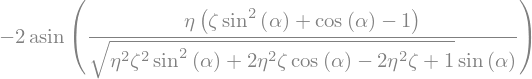

In [82]:
sp.simplify(theta_sol.subs({L:1}))

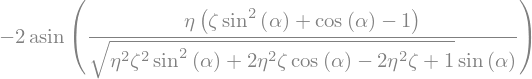

In [83]:
theta_normed = sp.simplify(theta_sol)
theta_normed

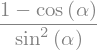

In [84]:
zeta_flat_ = sp.solve(theta_normed.args[1].args[0].args[3],zeta)[0]
zeta_flat_

In [85]:
get_zeta_flat = sp.lambdify(alpha, zeta_flat_)

In [86]:
zeta_0 = get_zeta_flat(alpha_range[0])

In [87]:
from bmcs_shell.folding.wb_cell_4p import WBElem4Param
from bmcs_shell.folding.wb_tessellation import WBTessellation
b_ = 1
a_ = eta_range[-1] * b_
#c_ = zeta_range[-1] * a_
c_ = zeta_0 * a_ + 1e-3
data = dict(alpha=alpha_range[0],a=a_, b=b_, c=c_) # c_range[0])
wb = WBElem4Param(**data)
ws = WBTessellation(wb_cell=wb, show_wireframe=True, show_nodes=False, **data)
ws.interact()

In [139]:
import bmcs_utils.api as bu
b_ = 1
a_ = eta_range[-1] * b_
c_ = zeta_range[-1] * a_
c_ = zeta_0 * a_ + 1e-3
data = dict(alpha=1e-4,a=a_, b=b_, c=c_) # c_range[0])
wb = WBElem4Param(show_wireframe=True,**data)
app_window = bu.AppWindow(wb)

In [158]:
def wb_plot_mpl(eta, zeta, b_=1):
    a_ = eta * b_
    c_ = zeta * a_
    data = dict(alpha=1e-4,a=a_, b=b_, c=c_)
    wb = WBElem4Param(show_wireframe=True,**data)
    wb_X_Fia = wb.X_Ia[wb.I_Fi,:-1]
    wb_X_aiF = np.einsum('Fia->aiF', wb_X_Fia)
    wb_X_aLiF = wb_X_aiF[:,[[0,1],[1,2],[2,0]],:]
    x_iLF, y_iLF = np.einsum('aLiF->aiLF', wb_X_aLiF)
    return x_iLF.reshape(2,-1), y_iLF.reshape(2,-1)

In [159]:
wb_plot_mpl(eta_range[0], zeta_range[0])

(array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.3 ,  0.3 ,  0.3 ,
         -0.3 ,  0.3 , -0.3 , -0.3 , -0.3 ,  0.12, -0.12,  0.12, -0.12],
        [ 0.3 ,  0.3 ,  0.3 , -0.3 ,  0.3 , -0.3 , -0.3 , -0.3 ,  0.12,
         -0.12,  0.12, -0.12,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  1.,  1., -1., -1.,  1.,
         -1.,  0.,  0.,  0.,  0.],
        [ 1., -1.,  1.,  1., -1., -1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.]]))

In [160]:
_, axes = plt.subplots(2,3)
((ax11,ax12,ax13), (ax21, ax22, ax23)) = axes
ax11.plot(*wb_plot_mpl(eta_range[0], zeta_range[0]), color='black')
ax12.plot(*wb_plot_mpl(eta_range[0], zeta_0), color='black')
ax13.plot(*wb_plot_mpl(eta_range[0], zeta_range[-1]), color='black')
ax21.plot(*wb_plot_mpl(eta_range[-1], zeta_range[0]), color='black')
ax22.plot(*wb_plot_mpl(eta_range[-1], zeta_0), color='black')
ax23.plot(*wb_plot_mpl(eta_range[-1], zeta_range[-1]), color='black')
fig.tight_layout = True
for ax_row in axes:
    for ax in ax_row:
        ax.set_aspect('equal', 'box')
        ax.axis('off')
        ax.set_xlim(-1.2,1.2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [161]:
app_window.interact()

In [162]:
app_window.pb.plot_fig.grid_visible=False

In [165]:
H_sol

In [163]:
h_normed = (H_sol).subs(c,zeta*a).subs(zeta, zeta_flat_)

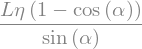

In [164]:
h_normed

In [76]:
get_h_normed = sp.lambdify((alpha,eta,L), h_normed)

In [77]:
_, ax = plt.subplots(1,1)
alpha_range = np.linspace(1e-5,np.pi/2,100)
ax.plot(alpha_range, get_h_normed(alpha_range,0.5,1))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 